<a href="https://colab.research.google.com/github/LJ1201/MSDS-490-Bank_Campaign/blob/main/BankMkting_Clustering_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import packages

In [150]:
!pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Rand Index
from sklearn.metrics.cluster import rand_score

# Encode labels
from sklearn import preprocessing


import gower

## Import dataset

Data Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


##Attribute Information:

Input variables:

#Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')



Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)


17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)


19 - euribor3m: euribor 3 month rate - daily indicator (numeric)


20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):


21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




#Relevant Papers:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]



In [152]:
url = 'https://raw.githubusercontent.com/LJ1201/MSDS-490-Bank_Campaign/main/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

In [153]:
data_full = data.copy()
data_full = data.drop(['duration'],axis = 1)

In [154]:
data_full_tran = data_full.copy()

In [155]:
np.random.seed(42)

In [156]:
data_full_yes = data_full[data_full['y'] == 'yes']
data_full_no = data_full[data_full['y'] == 'no']

In [157]:
# data_full_no = data_full_no.sample(frac = 0.15)

In [158]:
# data_full_sample = pd.concat([data_full_yes, data_full_no], sort=False)

In [159]:
# data_full_sample = data_full_sample.reset_index()
# data_full_sample = data_full_sample.drop(['index'], axis = 1)

In [160]:
# data_full_yes = data_full_yes.reset_index()

In [161]:
# data_full_yes= data_full_yes.drop(['index'], axis = 1)

In [162]:
# target = data_full_yes[['y']]
# data_no_target = data_full_yes.drop(['y'],axis=1)
# data_no_target.head()

In [163]:
# target = data_full_sample[['y']]
# data_no_target = data_full_sample.drop(['y'],axis=1)
# data_no_target.head()

In [164]:
# data1_no_target = data_full_yes.drop(['y'],axis=1)

##Numeric Variables Transform

Age - 

1 = 10-19
2 = 20-30

In [165]:
data_full_tran['age'] = data_full_tran['age']//10

In [166]:
data_full_tran.nunique()

age                 9
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [167]:
data_full_tran.head().T

,0,1,2,3,4
age,5,5,3,4,5
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


Campaign

In [168]:
# for i in range(0, len(data_full_tran)):
#   if data_full_tran['campaign'][i] > 10:
#     data_full_tran['campaign'][i] = 11

Pdays into Pweeks

In [169]:
# data_full_tran['pweeks'] =data_full_tran['pdays']

In [170]:
# for i in range(0, len(data_full_tran)):
#   if data_full_tran['pweeks'][i] <=28:
#     data_full_tran['pweeks'][i] = data_full_tran['pweeks'][i] // 7
#   elif data_full_tran['pweeks'][i] >28:
#     data_full_tran['pweeks'][i] = 5

In [171]:
# data_full_tran = data_full_tran.drop(['pdays'], axis = 1)

euribor3m - euribor 3 month rate

In [172]:
# for i in range(0,len(data_full_tran)):
#   if (data_full_tran['euribor3m'][i] >= 0) & (data_full_tran['euribor3m'][i] < 1) :
#     data_full_tran['euribor3m'][i] ='0 - 1'
#   elif (data_full_tran['euribor3m'][i] > 1 ) and (data_full_tran['euribor3m'][i] < 2) :
#     data_full_tran['euribor3m'][i] ='1 - 2'
#   elif (data_full_tran['euribor3m'][i] >= 2) and (data_full_tran['euribor3m'][i] < 3) :
#     data_full_tran['euribor3m'][i] ='2 - 3'
#   elif (data_full_tran['euribor3m'][i] >= 3) and (data_full_tran['euribor3m'][i] < 4) :
#     data_full_tran['euribor3m'][i] ='3 - 4'
#   elif (data_full_tran['euribor3m'][i] >= 4) :
#     data_full_tran['euribor3m'][i] ='> 5'



cons.price.idx

In [173]:
# for i in range(0,len(data_full_tran)):
#   if (data_full_tran['cons.price.idx'][i] >= 92) & (data_full_tran['cons.price.idx'][i] < 93) :
#     data_full_tran['cons.price.idx'][i] = '92 - 93'
#   elif (data_full_tran['cons.price.idx'][i] >= 93 ) and (data_full_tran['cons.price.idx'][i] < 94) :
#     data_full_tran['cons.price.idx'][i] ='93 - 94'
#   elif (data_full_tran['cons.price.idx'][i] >= 94) :
#     data_full_tran['cons.price.idx'][i] ='over 94'


cons.conf.idx

In [174]:
# for i in range(0,len(data_full_tran)):
#   if (data_full_tran['cons.conf.idx'][i] >= 40)  :
#     data_full_tran['cons.conf.idx'][i] = 'over 40'
#   elif (data_full_tran['cons.conf.idx'][i] <40 ) :
#     data_full_tran['cons.conf.idx'][i] ='less than 40'


In [175]:
data_full_tran.nunique()

age                 9
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [254]:
data_full_tran_test = data_full_tran.copy()

In [177]:
data_full_tran_test.shape

(41188, 20)

In [178]:
data_full_tran_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,5,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [179]:
data_full_tran_test.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [194]:
dt=data_full_tran_test.dtypes
objList = []
for i in dt.index :
    if dt[i] in (["object"]) : objList.append( i )


In [195]:
objList.remove('y')

In [196]:
objList

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [197]:
for i in objList:
  data_full_tran_test[i] = data_full_tran_test[i].astype('category')

In [200]:
for i in objList:
  data_full_tran_test[i] = data_full_tran_test[i].cat.codes

In [199]:
data_full_tran_test.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object

In [201]:
data_full_tran_test_0 = data_full_tran_test[data_full_tran_test['y'] =="no"]
data_full_tran_test_1 = data_full_tran_test[data_full_tran_test['y'] == "yes"]


In [228]:
data_full_tran_test_all = data_full_tran_test.drop(['y'],axis = 1)

In [229]:
data_full_tran_test_0 = data_full_tran_test_0.drop(['y'],axis = 1)
data_full_tran_test_1 = data_full_tran_test_1.drop(['y'],axis = 1)

KeyError: ignored

In [203]:
data_full_tran_test_0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,5,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,5,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,3,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,4,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,5,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,3,0,1,6,0,0,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,2,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6
41184,4,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,5,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


clustering

In [204]:
# % pip install kneed

In [205]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [230]:
# features_0 = data_full_tran_test_0
# features_1 = data_full_tran_test_1
features_all = data_full_tran_test_all


In [231]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_all)

In [232]:
kmeans_kwargs = {"init": "random","n_init": 10, "max_iter": 300,"random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

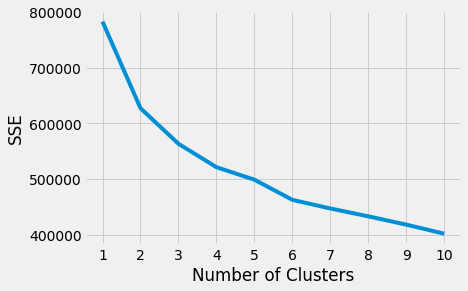

In [233]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [234]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

In [235]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

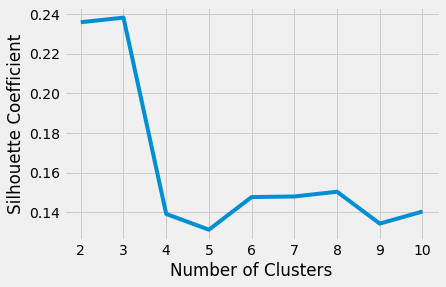

In [236]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [257]:
kmeans = KMeans(init="random",n_clusters=5,n_init=10,max_iter=300,random_state=30)

In [258]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=30)

In [259]:
kmeans.inertia_

484961.40050262597

In [260]:
kmeans.cluster_centers_

array([[-1.14297933e-02, -3.02822628e-03,  4.94364091e-02,
         1.21061553e-02, -2.06757254e-01,  6.64496525e-02,
         9.92997546e-04, -6.12064598e-01,  3.02584402e-01,
        -4.95989682e-02, -2.02186216e-01,  1.94126779e-01,
         1.91640352e+00, -2.56309793e+00, -1.11493937e+00,
        -8.98664438e-01, -5.15681726e-01, -1.12066093e+00,
        -9.93715981e-01],
       [ 1.67307470e-01,  1.44978255e-01,  1.93550797e-01,
         2.38905926e-01, -4.09655641e-01,  5.45776375e-02,
        -1.57196457e-03, -6.03561440e-01,  2.44974127e-01,
         4.96317270e-02, -2.69766953e-01, -5.11727855e+00,
         3.00576641e+00,  2.43505737e+00, -1.38663339e+00,
        -4.02236057e-01,  4.68636188e-01, -1.51968035e+00,
        -1.90776641e+00],
       [-7.26077227e-02, -8.79189389e-03,  1.44424418e-01,
         1.91796741e-02, -2.47870091e-01,  9.23772459e-02,
         1.32014658e-03, -5.21354589e-01,  1.23116596e-02,
        -7.24039491e-02, -1.46827895e-01,  1.95413900e-01,
    

In [262]:
df_1 = data_full_tran_test.copy()

In [263]:
df_1.insert(19, "Cluster", kmeans.labels_, True)

In [264]:
df_2 = df_1.groupby(['Cluster','y'])['y'].count()

In [265]:
df_2

Cluster  y  
0        no      3578
         yes      533
1        no       548
         yes      966
2        no      6785
         yes     1830
3        no     13083
         yes      533
4        no     12554
         yes      778
Name: y, dtype: int64

In [303]:
kmeans = KMeans(init="random",n_clusters=7,n_init=10,max_iter=300,random_state=42)

In [304]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=7, random_state=42)

In [305]:
kmeans.inertia_

447056.6717007663

In [306]:
kmeans.cluster_centers_

array([[ 3.37569883e-01, -4.13424538e-02, -1.83141499e-01,
        -3.68937268e-01,  1.94642349e+00, -5.81530011e-02,
         1.38408793e-03,  4.67278160e-01, -3.90802327e-02,
         5.42267329e-03, -6.34767043e-02,  1.95413900e-01,
        -3.49193863e-01,  1.92212360e-01,  7.23379881e-01,
         6.26719174e-01,  2.82287354e-01,  7.23637641e-01,
         6.39400612e-01],
       [-1.11297213e-01, -4.24311176e-02, -7.97458470e-02,
        -6.00178678e-02, -5.13599691e-01, -1.36664117e-01,
        -1.07386416e-02,  1.31804024e+00,  4.12809678e-01,
        -4.96275998e-03, -9.68959861e-02,  1.95413900e-01,
        -3.49494284e-01,  1.92622072e-01,  6.91815810e-01,
         9.15191772e-01,  3.80159121e-01,  7.18005526e-01,
         5.32974687e-01],
       [ 6.54105750e-02, -8.11833259e-02, -3.49052259e-02,
         5.27344401e-02,  1.03460445e-01, -9.00895042e-02,
        -4.92232168e-03,  3.93918854e-01, -3.34214168e-01,
        -8.05458679e-02,  4.48382200e+00,  1.95413900e-01,
    

In [307]:
df_3 = data_full_tran_test.copy()

In [308]:
df_3.insert(19, "Cluster", kmeans.labels_, True)

In [309]:
df_4 = df_3.groupby(['Cluster','y'])['y'].count()
df_4

Cluster  y  
0        no     6438
         yes     295
1        no     8672
         yes     369
2        no     1019
         yes      37
3        no      548
         yes     966
4        no     3576
         yes     533
5        no     8903
         yes    1949
6        no     7392
         yes     491
Name: y, dtype: int64

DBSCAN

In [311]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [312]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=9)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)

dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

In [317]:
[fte_colors[label] for label in kmeans.labels_]

KeyError: ignored

In [318]:
kmeans.labels_

array([2, 6, 2, ..., 3, 3, 7], dtype=int32)

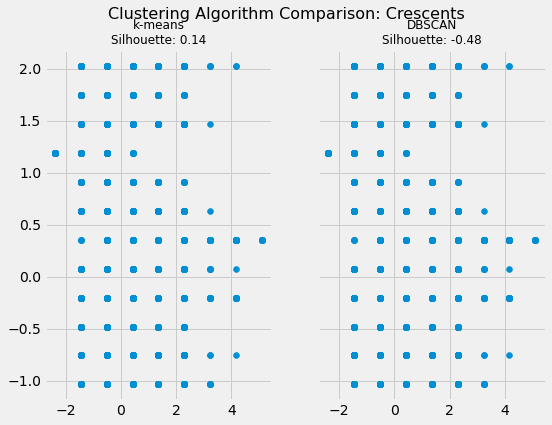

In [323]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
0: "#008fd5",
1: "#fc4f30",
}
# The k-means plot
# km_colors = [fte_colors[label] for label in kmeans.labels_]
# ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)

ax1.scatter(scaled_features[:, 0], scaled_features[:, 1])
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
# db_colors = [fte_colors[label] for label in dbscan.labels_]
# ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1])
ax2.set_title(
f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [328]:
ari_kmeans = adjusted_rand_score(data_full_tran_test['y'], kmeans.labels_)
ari_dbscan = adjusted_rand_score(data_full_tran_test['y'], dbscan.labels_)

round(ari_kmeans, 2)


0.02

In [329]:

round(ari_dbscan, 2)

-0.04

In [330]:
import numpy as np
from sklearn.neighbors import NearestNeighbors


df_5 = data_full_tran_test_all.copy()
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(df_5)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df_5)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

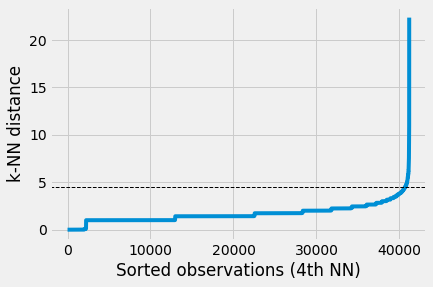

In [334]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=4.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [345]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=2.5, min_samples=4.5).fit(df_5)
# get cluster labels
clusters.labels_



array([ 0,  0,  0, ..., 94, 91, 94])

In [346]:

# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, -1}
# -1 value represents noisy points could not assigned to any cluster

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [347]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 3426,
         0: 7596,
         1: 10574,
         2: 10,
         3: 5,
         4: 5,
         5: 5,
         6: 5,
         7: 5043,
         8: 8,
         9: 5,
         10: 3531,
         11: 77,
         12: 89,
         13: 36,
         14: 12,
         15: 2336,
         16: 2,
         17: 10,
         18: 5,
         19: 5547,
         20: 9,
         21: 7,
         22: 23,
         23: 588,
         24: 6,
         25: 15,
         26: 49,
         27: 34,
         28: 12,
         29: 16,
         30: 569,
         31: 11,
         32: 10,
         33: 17,
         34: 7,
         35: 197,
         36: 14,
         37: 68,
         38: 37,
         39: 236,
         40: 95,
         41: 5,
         42: 8,
         43: 4,
         44: 10,
         45: 5,
         46: 5,
         47: 4,
         48: 5,
         49: 20,
         50: 8,
         51: 12,
         52: 7,
         53: 50,
         54: 8,
         55: 18,
         56: 4,
         57: 7,
         58:

In [ ]:
distance_matrix = gower.gower_matrix(data_full_tran_test_0)

distance_matrix

In [ ]:
encoder = preprocessing.LabelEncoder()

encoded_target = target.apply(encoder.fit_transform)

print(f'in this encoding, {encoded_target.iloc[0].values} represents {target.iloc[0].values}')

labels = pd.DataFrame()
labels['target'] = encoded_target.values.reshape(1, -1).tolist()[0]

In [ ]:
model_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='precomputed')
clusters_complete = model_complete.fit_predict(distance_matrix)

In [ ]:
labels['complete-predictions'] = clusters_complete

In [ ]:
cri = rand_score(encoded_target.values.reshape(1, -1)[0], clusters_complete)
print(f'Rand Index: {cri}')

In [ ]:
labels[['complete-predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [ ]:
# labels.value_counts(["target", "complete-predictions"])

The prediction seems to predict the class the other way around so we need to swap the classes.

In [ ]:
labels['aligned-clusters'] = labels['complete-predictions'].apply(lambda x: int(not x))

In [ ]:
labels

In [ ]:
labels.value_counts(["target", 'aligned-clusters'])

In [ ]:
cf_matrix = confusion_matrix(encoded_target.values.reshape(1, -1)[0], labels[["aligned-clusters"]].values.reshape(1, -1)[0])
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_labels = np.asarray(cf_labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=cf_labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [ ]:
cf_matrix

In [ ]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Attach prediction back to orginal data

In [ ]:
data_full_sample['prediction_y'] = labels['aligned-clusters']

In [ ]:
data_full_sample.head().T

In [ ]:
data_full_sample[data_full_sample['prediction_y'] == 1]

In [ ]:
data_full_sample.info()